**Kelompok - 26**
### Predict Students' Dropout and Academic Success

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [10]:
# ===============================
# STEP 1 — DATA COLLECTION & LOADING
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Baca dataset
df = pd.read_csv("data.csv", sep=";", encoding="utf-8-sig")

# Normalisasi nama kolom
def to_snake(s):
    return (
        s.strip()
        .lower()
        .replace(" ", "_")
        .replace("(", "")
        .replace(")", "")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
    )

df.columns = [to_snake(c) for c in df.columns]

print("Ukuran dataset:", df.shape)
print("\nJumlah missing values:", df.isna().sum().sum())
print("Jumlah baris duplikat:", df.duplicated().sum())
print("\nDistribusi Target:\n", df["target"].value_counts())

# Simpan dataframe asli untuk perbandingan
df_raw = df.copy()


Ukuran dataset: (4424, 37)

Jumlah missing values: 0
Jumlah baris duplikat: 0

Distribusi Target:
 target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


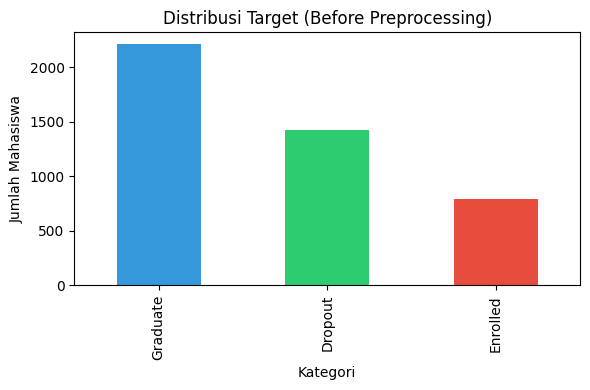

C:\Users\Asus\AppData\Local\Temp\ipykernel_3656\3004894265.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df_raw["target"].unique(), patch_artist=True)


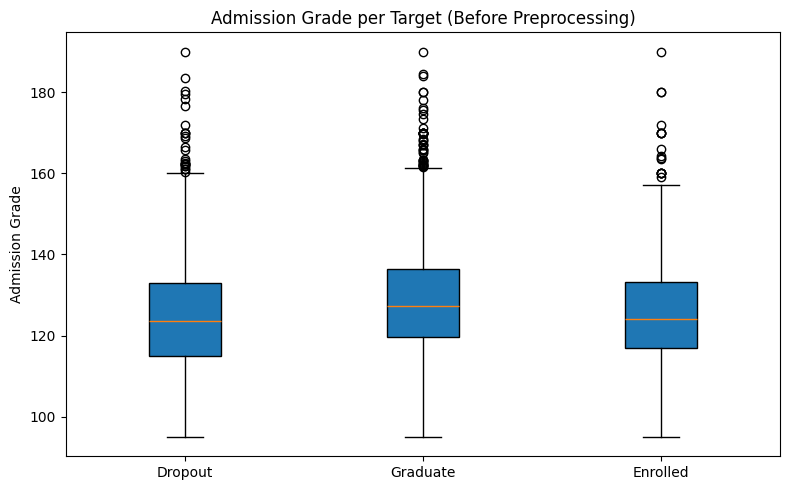

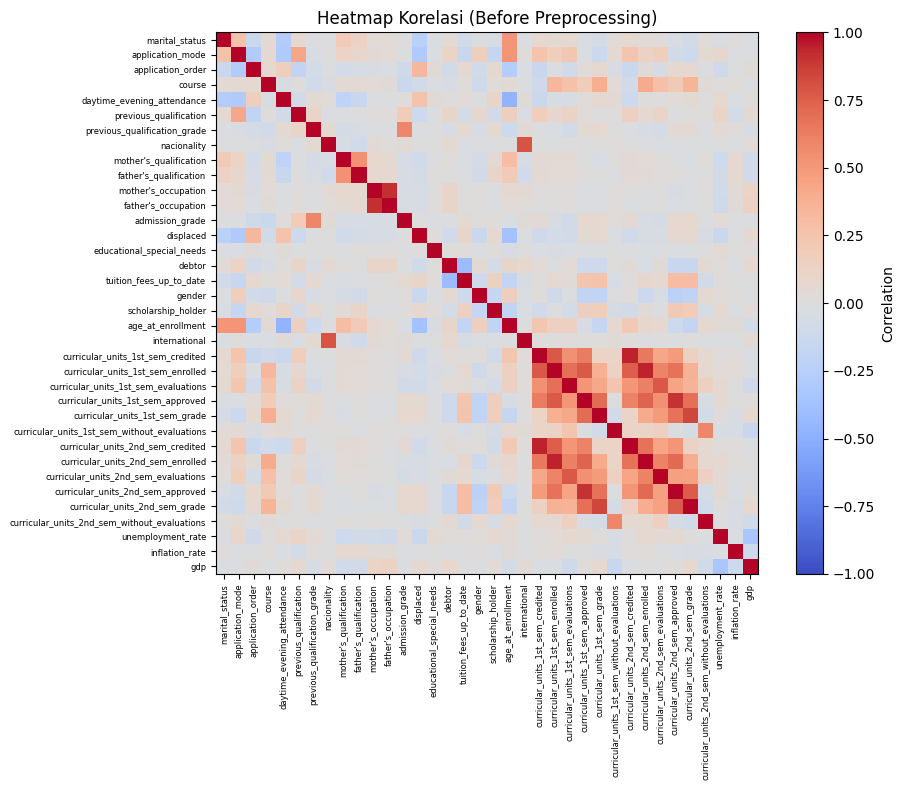

In [11]:
# ===============================
# STEP 2 — VISUALISASI BEFORE PREPROCESSING
# ===============================

plt.figure(figsize=(6, 4))
df_raw["target"].value_counts().plot(kind="bar", color=["#3498db", "#2ecc71", "#e74c3c"])
plt.title("Distribusi Target (Before Preprocessing)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Mahasiswa")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
groups = [df_raw[df_raw["target"] == g]["admission_grade"] for g in df_raw["target"].unique()]
plt.boxplot(groups, labels=df_raw["target"].unique(), patch_artist=True)
plt.title("Admission Grade per Target (Before Preprocessing)")
plt.ylabel("Admission Grade")
plt.tight_layout()
plt.show()

corr_before = df_raw.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_before, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.title("Heatmap Korelasi (Before Preprocessing)")
plt.xticks(np.arange(len(corr_before.columns)), corr_before.columns, rotation=90, fontsize=6)
plt.yticks(np.arange(len(corr_before.columns)), corr_before.columns, fontsize=6)
plt.tight_layout()
plt.show()


In [12]:
# ===============================
# STEP 3 — ADVANCED PREPROCESSING
# ===============================

# 1️⃣ Handling Outliers (IQR)
col = "admission_grade"
Q1, Q3 = df[col].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# 2️⃣ Feature Scaling
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 3️⃣ Encoding
cat_cols = df.select_dtypes(include=["object"]).columns.drop("target", errors="ignore")
print("Kolom kategorikal untuk encoding:", cat_cols.tolist())
if len(cat_cols) > 0:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nKolom hasil encoding kategorikal (contoh):")
encoded_cols = [c for c in df.columns if "_" in c and c not in num_cols]
print(encoded_cols[:10])

print("\nUkuran dataset setelah preprocessing:", df.shape)


Kolom kategorikal untuk encoding: []

Kolom hasil encoding kategorikal (contoh):
[]

Ukuran dataset setelah preprocessing: (4338, 37)


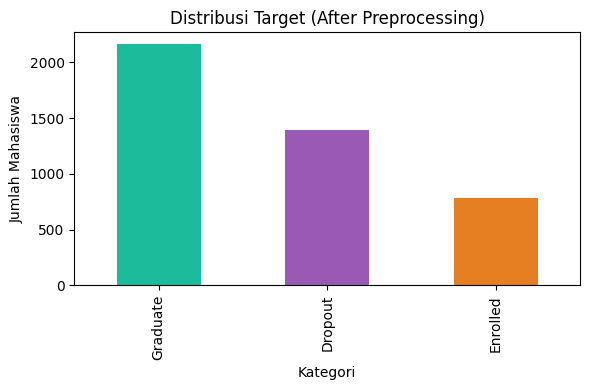

C:\Users\Asus\AppData\Local\Temp\ipykernel_3656\901985648.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df["target"].unique(), patch_artist=True)


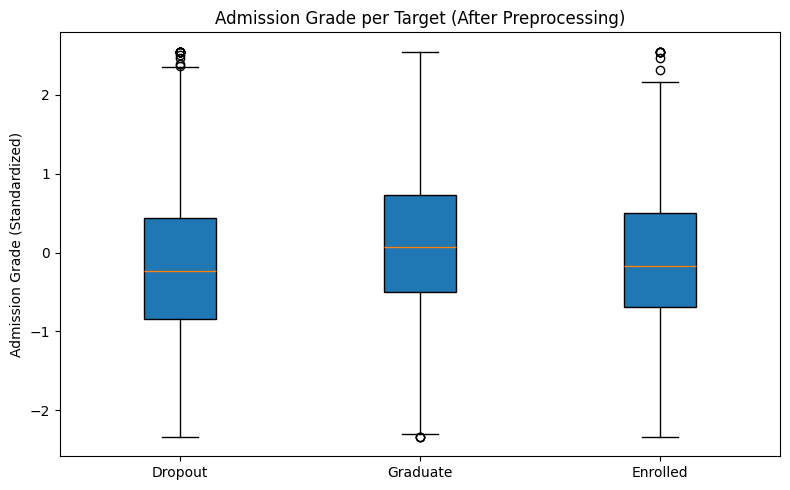

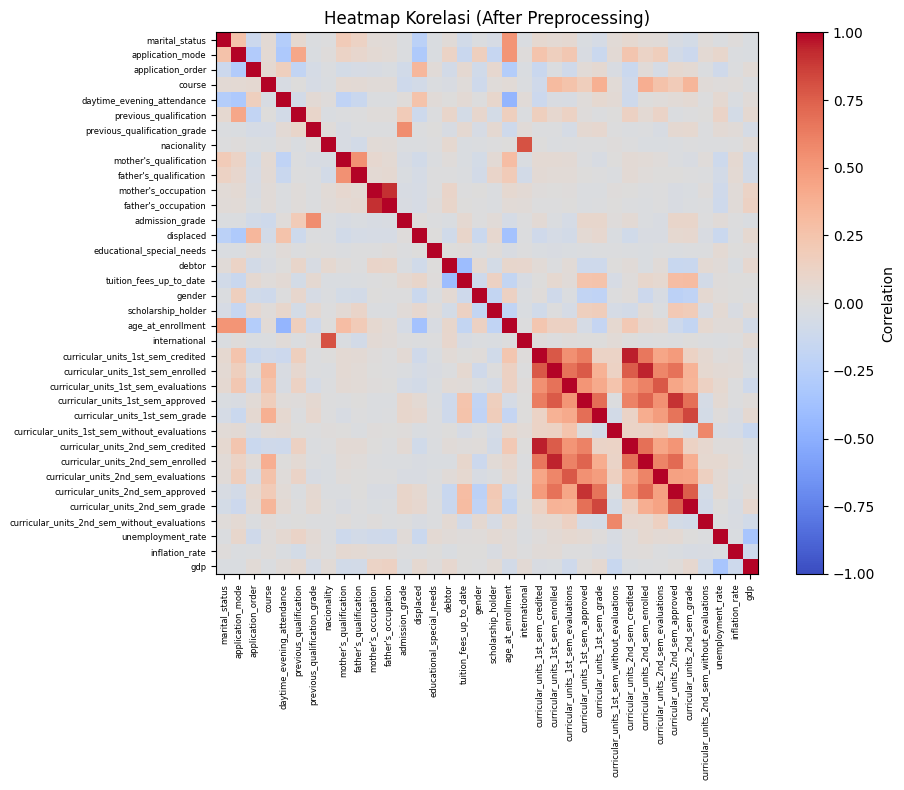

In [13]:
# ===============================
# STEP 4 — VISUALISASI AFTER PREPROCESSING
# ===============================

plt.figure(figsize=(6, 4))
df["target"].value_counts().plot(kind="bar", color=["#1abc9c", "#9b59b6", "#e67e22"])
plt.title("Distribusi Target (After Preprocessing)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Mahasiswa")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
groups = [df[df["target"] == g]["admission_grade"] for g in df["target"].unique()]
plt.boxplot(groups, labels=df["target"].unique(), patch_artist=True)
plt.title("Admission Grade per Target (After Preprocessing)")
plt.ylabel("Admission Grade (Standardized)")
plt.tight_layout()
plt.show()

corr_after = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_after, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.title("Heatmap Korelasi (After Preprocessing)")
plt.xticks(np.arange(len(corr_after.columns)), corr_after.columns, rotation=90, fontsize=6)
plt.yticks(np.arange(len(corr_after.columns)), corr_after.columns, fontsize=6)
plt.tight_layout()
plt.show()


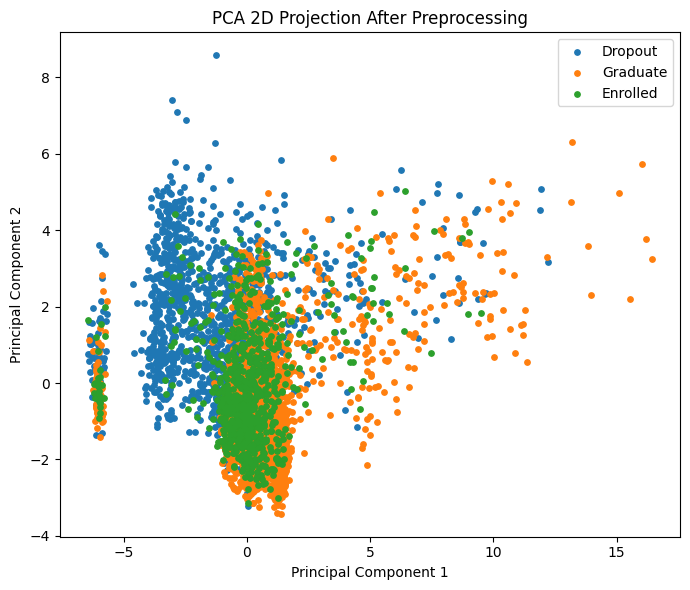

In [14]:
# ===============================
# STEP 5 — PCA 2D VISUALIZATION
# ===============================
from sklearn.decomposition import PCA

X_scaled = df.select_dtypes(include=[np.number])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["target"] = df["target"].values

plt.figure(figsize=(7, 6))
for label in pca_df["target"].unique():
    subset = pca_df[pca_df["target"] == label]
    plt.scatter(subset["PCA1"], subset["PCA2"], s=15, label=label)
plt.title("PCA 2D Projection After Preprocessing")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# STEP 6 — UJI STATISTIK

from scipy.stats import levene, f_oneway, kruskal, mannwhitneyu, spearmanr

# Ambil kolom admission grade dan target
col = 'admission_grade'
groups = [df[df['target']==g][col] for g in df['target'].unique()]

# Levene (uji homogenitas varians)
levene_stat, levene_p = levene(*groups)
print("Levene Test p-value:", levene_p)

# ANOVA
f_stat, f_p = f_oneway(*groups)
print("ANOVA p-value:", f_p)

# Kruskal-Wallis (non-parametrik)
kw_stat, kw_p = kruskal(*groups)
print("Kruskal-Wallis p-value:", kw_p)

# Mann-Whitney (Graduate vs Dropout saja)
g1 = df[df['target']=='Graduate'][col]
g2 = df[df['target']=='Dropout'][col]
u_stat, u_p = mannwhitneyu(g1, g2)
print("Mann-Whitney U p-value:", u_p)

# Spearman correlation (admission_grade vs curricular grade)
curr_col = [c for c in df.columns if 'curricular_units_1st_sem_grade' in c][0]
rho, p_spear = spearmanr(df[col], df[curr_col])
print(f"Spearman correlation (admission vs {curr_col}): rho={rho}, p={p_spear}")


Levene Test p-value: 0.00014682076322116772
ANOVA p-value: 1.1440976653298672e-17
Kruskal-Wallis p-value: 1.198432535771377e-16
Mann-Whitney U p-value: 1.950086030245911e-15
Spearman correlation (admission vs curricular_units_1st_sem_grade): rho=0.20930331367596358, p=3.8224901832642236e-44


In [16]:
# STEP 7 — INTERPRETASI HASIL

# Interpretasi sederhana berbasis output uji statistik:
if f_p < 0.05:
    print("Terdapat perbedaan signifikan pada admission_grade antar kategori target (ANOVA).")
else:
    print("Tidak ada perbedaan signifikan (ANOVA).")

if kw_p < 0.05:
    print("Hasil Kruskal-Wallis juga signifikan, memperkuat hasil ANOVA.")

if u_p < 0.05:
    print("Perbedaan signifikan antara Graduate dan Dropout (Mann-Whitney).")

if p_spear < 0.05:
    print(f"Ada korelasi signifikan antara admission_grade dan {curr_col} (Spearman).")


Terdapat perbedaan signifikan pada admission_grade antar kategori target (ANOVA).
Hasil Kruskal-Wallis juga signifikan, memperkuat hasil ANOVA.
Perbedaan signifikan antara Graduate dan Dropout (Mann-Whitney).
Ada korelasi signifikan antara admission_grade dan curricular_units_1st_sem_grade (Spearman).
